<a href="https://colab.research.google.com/github/LinaHu1990/Assignments/blob/main/CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Final Assignment - CO2 Emissions


In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## Question 1: What is the biggest predictor of a large CO2 output per capita of a country?

In [65]:
# Import data
# Clean data by drop rows with NAN values

def CO2_clean():
  url = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')
  df = pd.DataFrame(url)
  df_clean = df.dropna()
  return df_clean

df_CO2 = CO2_clean()

#print(df_CO2)


In [66]:
# Dataframe shows two variables that measure CO2 output per capita respectively co2_per_capita and consumption_co2_per_capita
# Calculate correlation between co2_per_capita and other variables
# Calculate correlation between consumption_co2_per_capita and other variables

corr_co2 = df_CO2.corr()['co2_per_capita'].abs().sort_values(ascending=False)
corr_cons = df_CO2.corr()['consumption_co2_per_capita'].abs().sort_values(ascending=False)

# Both result show a high correlation with energy_per_capita
# print(corr_co2.head(10))

<ipython-input-66-d4eaeed432c7>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_co2 = df_CO2.corr()['co2_per_capita'].abs().sort_values(ascending=False)
<ipython-input-66-d4eaeed432c7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_cons = df_CO2.corr()['consumption_co2_per_capita'].abs().sort_values(ascending=False)


In [ ]:
# Test statistical significance

r_co2 = pearsonr(df_CO2['co2_per_capita'], df_CO2['energy_per_capita'])

print (r_co2)

PearsonRResult(statistic=0.7572942206048902, pvalue=3.2402119916331483e-230)


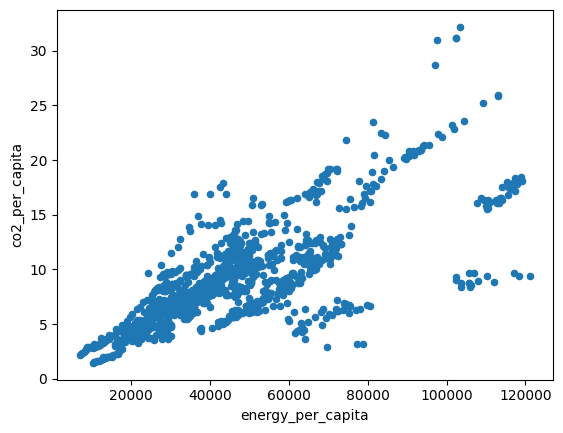

In [ ]:
graph = df_CO2.plot(x= 'energy_per_capita', y = 'co2_per_capita', kind = 'scatter')
plt.show()

## Answer to Question 1
The biggest predictor of a large CO2 output per capita of a country is the energy consumption per capita. There is a positive relation between both variables, meaning a higher energy consumption per capita will most likely increase the co2 output per capita. The pvalue < 0.05 and is considered to be statistically significant

## Discussion Question 1


Correlation Result for co2_per_capita show a high correlation between variables that provide an alternate definition to measure co2 per capita. These values are not taken into account in order to provide an answer. The highest variable that has a high correlation with co2_per_capita is energy_per_capita.  


## Question 2 Which countries are making the biggest strides in decreasing CO2 output?

In [27]:
# Sort dataset by year ascending
df_CO2_sorted = df_CO2.sort_values(by='year', ascending=True)

# Group dataset by country
grouped = df_CO2_sorted.groupby('country')

# Calculate the difference between the last and first co2_per_capita value per country
# This should give the absolute decrease for a country in the given timeperiod
diff = grouped['co2_per_capita'].last() - grouped['co2_per_capita'].first()

print(diff.sort_values(ascending=True).head(3))


country
Luxembourg   -15.273
Estonia       -9.942
Ukraine       -8.470
Name: co2_per_capita, dtype: float64


In [29]:
# Calculate the relatively change in %

relative_change_percentage = (grouped['co2_per_capita'].last() - grouped['co2_per_capita'].first()) / grouped['co2_per_capita'].first() * 100
print(relative_change_percentage.sort_values(ascending= True).head(3))

country
Ukraine     -61.906154
Malta       -51.968864
Lithuania   -49.618967
Name: co2_per_capita, dtype: float64


## Answer to Question 2:

Top 3 countries that show the biggest decrease in co2 per capita in absolute terms are:

1.   Luxembourg
2.   Estonia
3.   Ukraine

The countries with the relative biggest decrease are:

1.   Ukraine
2.   Malta
3.   Lithuania









## Discussion Question 2

The answer is showing which countries have decreased the co2_per_capita the most. It is not providing context if this decrease is a result of intentional measures by a country or a result of external factors.


## Question 3 Which non-fossil fuel energy technology will have the best price in the future?

In [53]:
# Import and clean dataset
# Dataset includes data the costs for sustainable sources of energy

def energy_clean():
  url = pd.read_csv('https://raw.githubusercontent.com/LinaHu1990/Assignments/main/levelized-cost-of-energy.csv')
  df = pd.DataFrame(url)
  return df

df_energy = energy_clean()

# Rename columns
df_energy.columns = df_energy.columns.str.replace(' levelized cost of energy', '')

#print(df_energy)

In [54]:
# Data now includes row per country and year
# Calculate average per year
df_energy_average = df_energy.groupby('Year').mean()


<ipython-input-54-165e3104904b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_energy_average = df_energy.groupby('Year').mean()


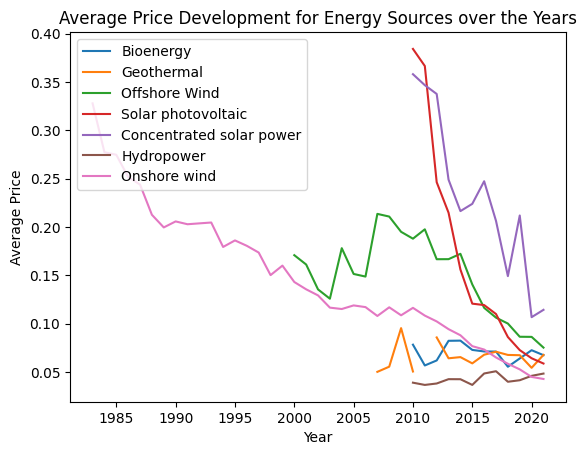

In [55]:
# Plot line chart to show historical price development for each energy source

x_values = df_energy_average.index

plt.plot(x_values, df_energy_average['Bioenergy'], label='Bioenergy')
plt.plot(x_values, df_energy_average['Geothermal'], label='Geothermal')
plt.plot(x_values, df_energy_average['Offshore wind'], label='Offshore Wind')
plt.plot(x_values, df_energy_average['Solar photovoltaic'], label='Solar photovoltaic')
plt.plot(x_values, df_energy_average['Concentrated solar power'], label='Concentrated solar power')
plt.plot(x_values, df_energy_average['Hydropower'], label='Hydropower')
plt.plot(x_values, df_energy_average['Onshore wind'], label='Onshore wind')

# Add labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.title('Average Price Development for Energy Sources over the Years')

# Show the plot
plt.show()

#Result shows that mainly Solar Photovoltaic and Concentrated Solar Power show a steep price decrease over the past 10 years

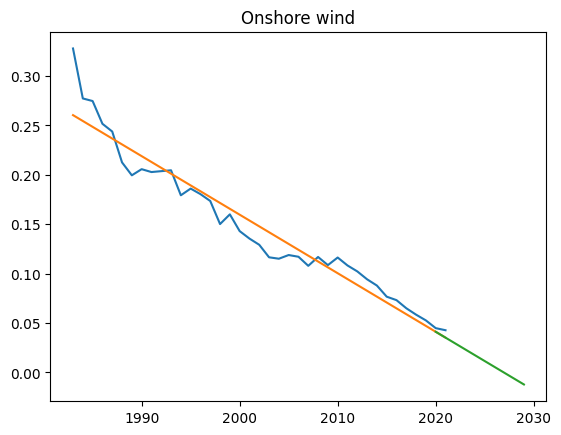

In [62]:
# Perform linear regression for Solar Photovoltaic and Concentrated Solar Power

# Filter out rows with NaN values in ['name sustainable energy source'] column
energy_average = df_energy_average.dropna(subset=['Onshore wind'])

# NumPy regression
x_values = energy_average.index
y_values = energy_average['Onshore wind']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Regression line
regression_line = slope * x_values + intercept

# Plot line chart for energy source with the corresponding average prices
plt.plot(x_values, y_values)

# Plot the linear regression line
plt.plot(x_values, regression_line)

# Predict value for future timerange untill year 2030
additional_years = range(2020, 2030)
predicted_values = slope * additional_years + intercept
plt.plot(additional_years, predicted_values)

# Show the plot
plt.title('Onshore ')
plt.show()


In [63]:
# Solar Photovoltaic shows a price of lower than -0.2
# Concentrated solar power shows a price of -0.01
# Onshore wind shows as well a price close to 0

## Answer to Question 3:

Either Solar Photovoltaic, Concentrated Solar Power or Onshore Wind will have the lowest price in the future. All energy sources show a decreasing trend for the past 10 years and this trend is expected to continue for the coming 10 years.

## Discussion Question 3
The answer is assuming the historical trend will continue it is not taking into account other variables influencing the costs of energy